# Crop Price Estimation

---



In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading  the dataset
data = pd.read_csv('crop_data.csv')
data

,District,Crop,Price Date,Crop Price (Rs per quintal)
0,Ariyalur,Banana,Jan-15,1830.0
1,Ariyalur,Banana,Jan-15,1820.0
2,Ariyalur,Banana,Feb-15,1730.0
3,Ariyalur,Banana,Mar-15,1780.0
4,Ariyalur,Banana,Apr-15,1900.0
...,...,...,...,...
29995,Virudhunagar,Rice,Jan-22,1750.0
29996,Virudhunagar,Rice,May-22,1780.0
29997,Virudhunagar,Rice,Aug-22,1745.0
29998,Virudhunagar,Rice,Sep-22,1745.0


In [7]:
# Checking for missing values
data.isnull().sum()

District                       28
Crop                           28
Price Date                     86
Crop Price (Rs per quintal)    28
dtype: int64

In [8]:
# Dropping rows with null values
data = data.dropna()

In [12]:
# Converting 'Price Date' to datetime
data['Price Date'] = pd.to_datetime(data['Price Date'], format='%b-%y')

<ipython-input-12-e185efdf6a73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Date'] = pd.to_datetime(data['Price Date'], format='%b-%y')


In [13]:
data

,District,Crop,Price Date,Crop Price (Rs per quintal)
0,Ariyalur,Banana,2015-01-01,1830.0
1,Ariyalur,Banana,2015-01-01,1820.0
2,Ariyalur,Banana,2015-02-01,1730.0
3,Ariyalur,Banana,2015-03-01,1780.0
4,Ariyalur,Banana,2015-04-01,1900.0
...,...,...,...,...
29995,Virudhunagar,Rice,2022-01-01,1750.0
29996,Virudhunagar,Rice,2022-05-01,1780.0
29997,Virudhunagar,Rice,2022-08-01,1745.0
29998,Virudhunagar,Rice,2022-09-01,1745.0


In [14]:
# Extracting month and year
data['Month'] = data['Price Date'].dt.month
data['Year'] = data['Price Date'].dt.year

<ipython-input-14-f80ce524f719>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Price Date'].dt.month
<ipython-input-14-f80ce524f719>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Price Date'].dt.year


In [17]:
# Average price per month
avg_price = data.groupby(['District', 'Crop', 'Year', 'Month'])['Crop Price (Rs per quintal)'].mean().reset_index()
avg_price

,District,Crop,Year,Month,Crop Price (Rs per quintal)
0,Ariyalur,Banana,2015,1,1825.0
1,Ariyalur,Banana,2015,2,1730.0
2,Ariyalur,Banana,2015,3,1780.0
3,Ariyalur,Banana,2015,4,1900.0
4,Ariyalur,Banana,2015,5,1850.0
...,...,...,...,...,...
13839,Virudhunagar,Rice,2022,1,1750.0
13840,Virudhunagar,Rice,2022,5,1780.0
13841,Virudhunagar,Rice,2022,8,1745.0
13842,Virudhunagar,Rice,2022,9,1745.0


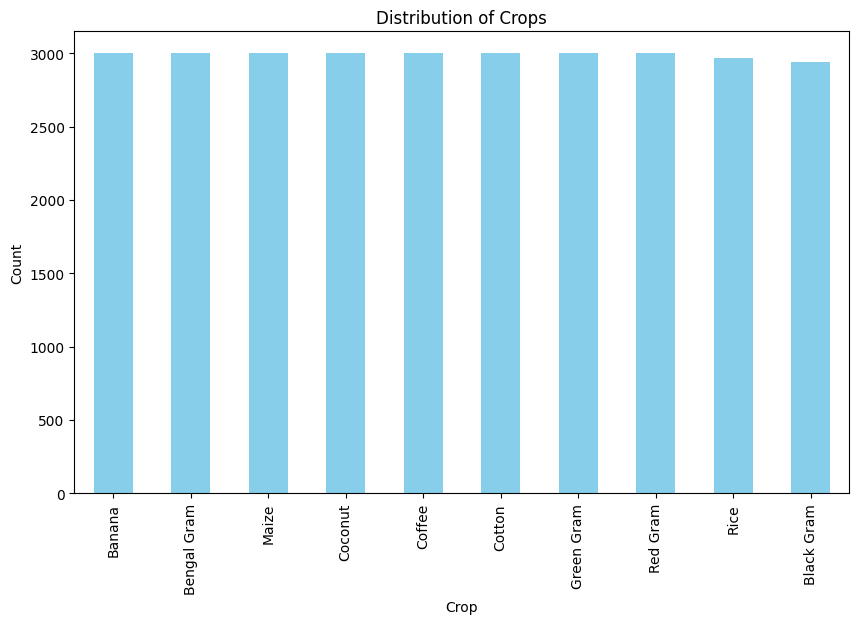

In [18]:
# Distribution of Crops
plt.figure(figsize=(10, 6))
crop_counts = data['Crop'].value_counts()
crop_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

The data is very uniformaly distributed.

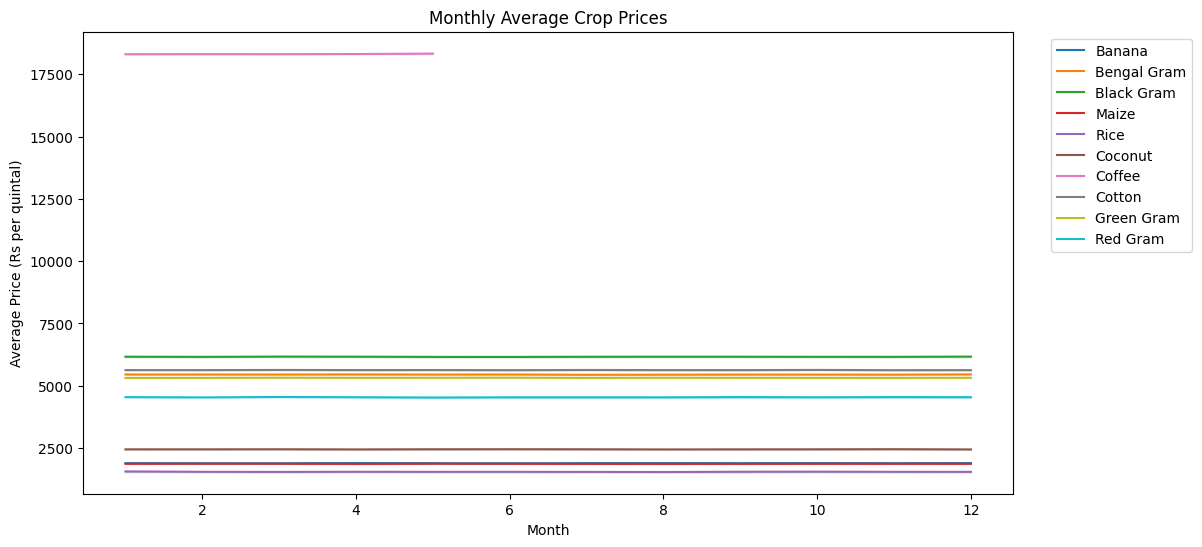

In [19]:
# Monthly Average Crop Prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Crop Price (Rs per quintal)', hue='Crop', data=avg_price)
plt.title('Monthly Average Crop Prices')
plt.xlabel('Month')
plt.ylabel('Average Price (Rs per quintal)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

The average prices of each crop stay almost consistent.

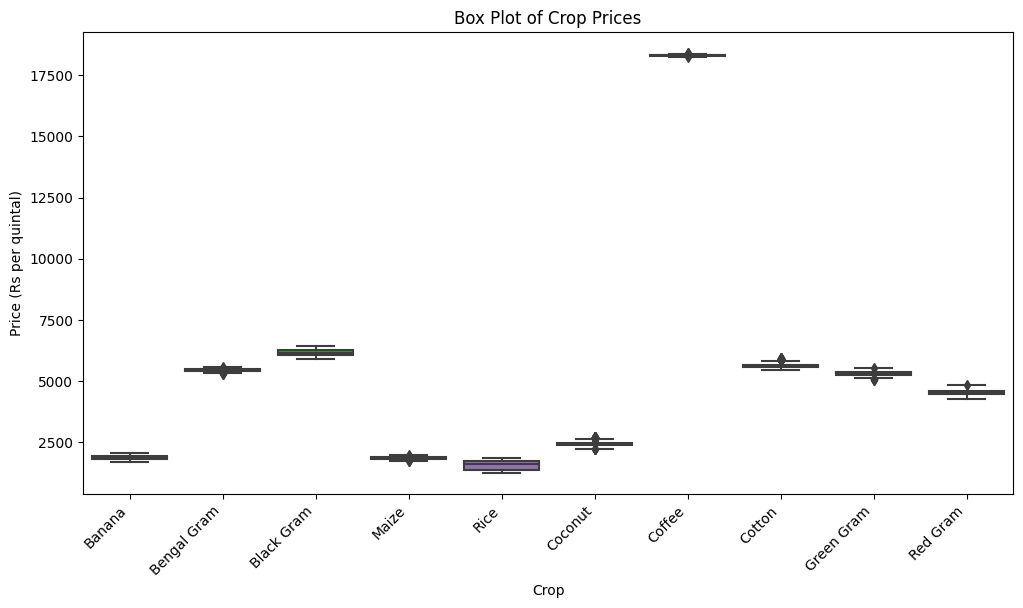

In [20]:
# Box plot for Crop Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Crop Price (Rs per quintal)', data=avg_price)
plt.title('Box Plot of Crop Prices')
plt.xlabel('Crop')
plt.ylabel('Price (Rs per quintal)')
plt.xticks(rotation=45, ha='right')
plt.show()

Coffee is the most expensive crop being sold in the state of Tamil Nadu.

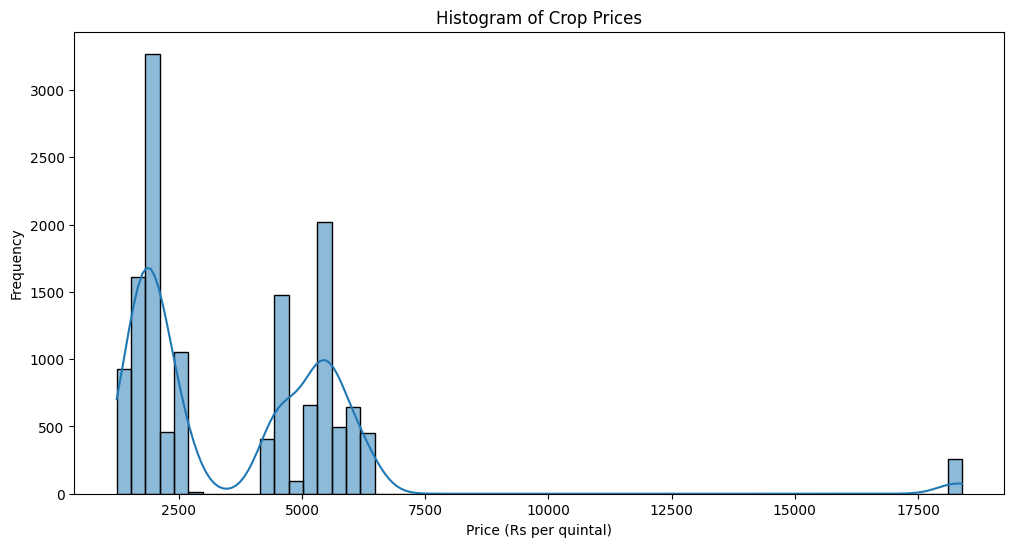

In [21]:
# Histogram of Crop Prices
plt.figure(figsize=(12, 6))
sns.histplot(data=avg_price, x='Crop Price (Rs per quintal)', kde=True)
plt.title('Histogram of Crop Prices')
plt.xlabel('Price (Rs per quintal)')
plt.ylabel('Frequency')
plt.show()